In [99]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from autosklearn.classification import AutoSklearnClassifier

import pandas as pd
import numpy as np

# Airlines

In [100]:
path = '//home//maraks//Desktop//datasets//binary//airlines.csv'
data = pd.read_csv(path)
data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [101]:
for column in data.columns:
    if(column in ['Flight','DayOfWeek','Time','Length'] ):
        data[column] = pd.to_numeric(data[column])
    elif(column in ['Airline','AirportFrom','AirportTo','Delay'] ):
        data[column] = data[column].astype('category')


In [105]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]


X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=130, 
        per_run_time_limit=60,
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

/home/maraks/anaconda3/envs/AutoSklearnJupyter/lib/python3.7/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.4 | 1.19.4    | 1.19.2  |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Accuracy score 0.5546178603740564


In [106]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessing:categorical_transformer:categorical_encoding:__choice__,param_data_preprocessing:categorical_transformer:category_coalescence:__choice__,...,param_classifier:sgd:l1_ratio,param_classifier:sgd:power_t,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.0,60.742840,"{'balancing:strategy': 'none', 'classifier:__c...",1,Timeout,0.0,none,random_forest,one_hot_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,52.759578,"{'balancing:strategy': 'none', 'classifier:__c...",1,Timeout,0.0,none,random_forest,no_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#show_results(automl)

# Amazon employee access

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//Amazon_employee_access.csv'
data = pd.read_csv(path)
data

In [ ]:
for column in data.columns:

    if(column in ['target'] ):
        data[column] = data[column].astype('category')
    elif(column in ['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2',
                'ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC', 
                'ROLE_FAMILY', 'ROLE_CODE'] ):
        data[column] = pd.to_numeric(data[column])


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

In [ ]:
show_results(automl)

# blood-transfusion-service-center

In [109]:
path = '//home//maraks//Desktop//datasets//binary//blood-transfusion-service-center.csv'
data = pd.read_csv(path)
data

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


In [110]:
for column in data.columns:

    if(column in ['V1','V2','V3','V4'] ):
        data[column] = pd.to_numeric(data[column])
    elif(column in ['Class'] ):
        data[column] = data[column].astype('category')

In [111]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

/home/maraks/anaconda3/envs/AutoSklearnJupyter/lib/python3.7/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.4 | 1.19.4    | 1.19.2  |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Accuracy score 0.732620320855615


In [112]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessing:categorical_transformer:categorical_encoding:__choice__,param_data_preprocessing:categorical_transformer:category_coalescence:__choice__,...,param_classifier:sgd:l1_ratio,param_classifier:sgd:power_t,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.0,3.684456,"{'balancing:strategy': 'none', 'classifier:__c...",1,Timeout,0.0,none,random_forest,one_hot_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,3.678747,"{'balancing:strategy': 'none', 'classifier:__c...",1,Timeout,0.0,none,random_forest,one_hot_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,3.686576,"{'balancing:strategy': 'none', 'classifier:__c...",1,Timeout,0.0,none,random_forest,no_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
show_results(automl)

KeyError: 'Timestamp'

# Cifar-10

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//cifar-10-binary.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    if(column in ['class'] ):
        data[column] = data[column].astype('category')
    else:
        data[column] = pd.to_numeric(data[column])


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=120, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# Connect-4-balanced

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//connect-4-balanced-binary.csv'
data = pd.read_csv(path)
data

In [ ]:
for column in data.columns:
    data[column] = data[column].astype('category')

In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# Connect-4-imbalanced

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//connect-4-imbalanced-binary.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    data[column] = data[column].astype('category')


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# Fashion-MNIST

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//Fashion-MNIST-binary.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    if(column in ['class'] ):
        data[column] = data[column].astype('category')
    else:
        data[column] = pd.to_numeric(data[column])


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# Jungle chess

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//jungle_chess_2pcs_raw_endgame_complete-binary.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    if(column in ['class'] ):
        data[column] = data[column].astype('category')
    else:
        data[column] = pd.to_numeric(data[column])


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# kc1

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//kc1.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    if(column in ['defects'] ):
        data[column] = data[column].astype('category')
    else:
        data[column] = pd.to_numeric(data[column])


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# KDDCup09_appetency

In [ ]:
path = '//home//maraks//Desktop//datasets//binary//KDDCup09_appetency.csv'
data = pd.read_csv(path)
data

In [ ]:

for column in data.columns:

    if(column in ['Var191','Var192','Var193','Var194','Var195',
    'Var196','Var197','Var198','Var199','Var200','Var201','Var202',
    'Var203','Var204','Var205','Var206','Var207','Var208',
    'Var210','Var211','Var212','Var213','Var214','Var215','Var216',
    'Var217','Var218','Var219','Var220','Var221','Var222','Var223',
    'Var224','Var225','Var226','Var227','Var228','Var229','APPETENCY'] ):
        data[column] = data[column].replace('?','NaN')
        data[column] = data[column].astype('category')
        
    else:
        data[column] = data[column].replace('?',-1)
        data[column] = pd.to_numeric(data[column])
        


In [ ]:
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=30, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5}
        )
#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

In [ ]:
pd.DataFrame(automl.cv_results_)

# Vehicle

In [114]:
path = '//home//maraks//Desktop//datasets//binary//vehicle-binary.csv'
data = pd.read_csv(path)
data

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,114,57,102,181,52,6,257,26,28,169,287,968,261,85,2,21,182,184,other
1,93,37,70,126,52,9,127,53,18,137,156,238,119,71,2,13,191,190,other
2,96,40,100,178,58,8,181,37,21,134,205,486,160,68,5,34,192,202,saab
3,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191,other
4,92,38,71,174,66,7,154,43,19,133,181,355,130,70,4,24,189,195,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184,other
430,82,36,51,114,53,4,135,50,18,126,150,268,144,86,15,4,181,182,saab
431,99,52,104,177,55,10,210,32,24,166,219,657,215,73,3,2,187,194,other
432,105,45,100,195,61,10,198,33,23,149,214,586,186,67,8,5,192,200,saab


In [115]:

for column in data.columns:

    if(column in ['Class'] ):
        data[column] = data[column].astype('category')
    else:
        data[column] = pd.to_numeric(data[column])
            

In [127]:
# sequential 123
X,y = data.iloc[:,:-1] , data.iloc[:,-1:]

X_train, X_test, y_train, y_test = \
      sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = AutoSklearnClassifier(
        time_left_for_this_task=130, 
        resampling_strategy='cv',
        resampling_strategy_arguments={'folds':5},
        ensemble_size=0,#123
        )

#automl = AutoSklearn2Classifier(time_left_for_this_task=30)

automl.fit(X_train, y_train, X_test, y_test)#(X_train, y_train)
automl.fit_ensemble(y_train, ensemble_size=50)#123

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

/home/maraks/anaconda3/envs/AutoSklearnJupyter/lib/python3.7/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| numpy   | 1.19.4 | 1.19.4    | 1.19.2  |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Accuracy score 0.7889908256880734


In [128]:
pd.DataFrame(automl.cv_results_)

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessing:categorical_transformer:categorical_encoding:__choice__,param_data_preprocessing:categorical_transformer:category_coalescence:__choice__,...,param_classifier:sgd:l1_ratio,param_classifier:sgd:power_t,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
0,0.747692,8.614445,"{'balancing:strategy': 'none', 'classifier:__c...",5,Success,0.0,none,random_forest,one_hot_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.526154,5.507455,"{'balancing:strategy': 'none', 'classifier:__c...",11,Success,0.0,none,gradient_boosting,one_hot_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,13.708447,"{'balancing:strategy': 'none', 'classifier:__c...",13,Timeout,0.0,none,extra_trees,one_hot_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.756923,5.288896,"{'balancing:strategy': 'weighting', 'classifie...",4,Success,0.0,weighting,gaussian_nb,no_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.766154,3.165181,"{'balancing:strategy': 'weighting', 'classifie...",2,Success,0.0,weighting,lda,no_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,13.724305,"{'balancing:strategy': 'weighting', 'classifie...",13,Timeout,0.0,weighting,extra_trees,one_hot_encoding,minority_coalescer,...,NaN,NaN,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.716923,7.288677,"{'balancing:strategy': 'none', 'classifier:__c...",9,Success,0.0,none,random_forest,no_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.763077,8.417052,"{'balancing:strategy': 'none', 'classifier:__c...",3,Success,0.0,none,extra_trees,one_hot_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.812308,2.627325,"{'balancing:strategy': 'none', 'classifier:__c...",1,Success,0.0,none,qda,no_encoding,minority_coalescer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.680000,3.731521,"{'balancing:strategy': 'none', 'classifier:__c...",10,Success,0.0,none,liblinear_svc,no_encoding,no_coalescense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


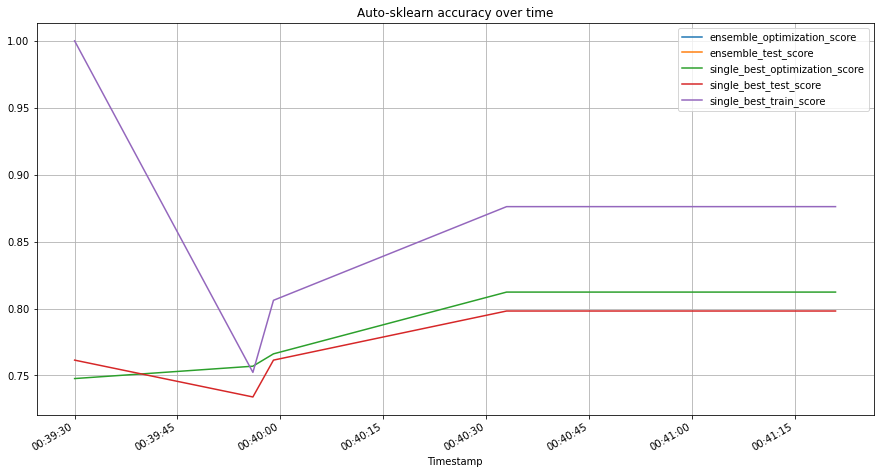

In [129]:
df1,df2 = show_results(automl)

In [130]:
df1

,Timestamp,single_best_optimization_score,single_best_test_score,single_best_train_score
0,2020-12-28 00:39:30,0.747692,0.761468,1.000000
1,2020-12-28 00:39:30,0.747692,0.761468,1.000000
2,2020-12-28 00:39:56,0.756923,0.733945,0.752308
3,2020-12-28 00:39:59,0.766154,0.761468,0.806154
4,2020-12-28 00:39:59,0.766154,0.761468,0.806154
5,2020-12-28 00:39:59,0.766154,0.761468,0.806154
6,2020-12-28 00:40:33,0.812308,0.798165,0.876154
7,2020-12-28 00:40:33,0.812308,0.798165,0.876154
8,2020-12-28 00:40:33,0.812308,0.798165,0.876154
9,2020-12-28 00:40:33,0.812308,0.798165,0.876154


In [131]:
df2

,Timestamp,ensemble_optimization_score,ensemble_test_score
0,2020-12-28 00:41:20.972409,0.812308,0.788991


In [132]:
print(automl.show_models())

[(0.480000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'qda', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:qda:reg_param': 0.563056219822946, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.32793677336996485},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.180000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'lda', 'data_preprocessing:categorical_transformer:categorical_en

In [133]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 93dddb74deabc4a5bec7e45492eaed59
  Metric: accuracy
  Best validation score: 0.812308
  Number of target algorithm runs: 15
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [122]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

from smac.tae import StatusType

import autosklearn.classification



def show_results(automl):
    
    def get_runhistory_models_performance(automl):
        metric = cls.automl_._metric
        data = automl.automl_.runhistory_.data
        performance_list = []
        for run_key, run_value in data.items():
            if run_value.status != StatusType.SUCCESS:
                # Ignore crashed runs
                continue
            # Alternatively, it is possible to also obtain the start time with ``run_value.starttime``
            endtime = pd.Timestamp(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(run_value.endtime)))
            val_score = metric._optimum - (metric._sign * run_value.cost)
            test_score = metric._optimum - (metric._sign * run_value.additional_info['test_loss'])
            train_score = metric._optimum - (metric._sign * run_value.additional_info['train_loss'])
            performance_list.append({
                'Timestamp': endtime,
                'single_best_optimization_score': val_score,
                'single_best_test_score': test_score,
                'single_best_train_score': train_score,
            })
        return pd.DataFrame(performance_list)


    ensemble_performance_frame = pd.DataFrame(automl.automl_.ensemble_performance_history)
    best_values = pd.Series({'ensemble_optimization_score': -np.inf,
                             'ensemble_test_score': -np.inf})
    for idx in ensemble_performance_frame.index:
        if (
            ensemble_performance_frame.loc[idx, 'ensemble_optimization_score']
            > best_values['ensemble_optimization_score']
        ):
            best_values = ensemble_performance_frame.loc[idx]
        ensemble_performance_frame.loc[idx] = best_values



    individual_performance_frame = get_runhistory_models_performance(automl)
    best_values = pd.Series({'single_best_optimization_score': -np.inf,
                             'single_best_test_score': -np.inf,
                             'single_best_train_score': -np.inf})
    for idx in individual_performance_frame.index:
        if (
            individual_performance_frame.loc[idx, 'single_best_optimization_score']
            > best_values['single_best_optimization_score']
        ):
            best_values = individual_performance_frame.loc[idx]
        individual_performance_frame.loc[idx] = best_values



    pd.merge(
        ensemble_performance_frame,
        individual_performance_frame,
        on="Timestamp", how='outer'
    ).sort_values('Timestamp').fillna(method='ffill').plot(
        x='Timestamp',
        kind='line',
        legend=True,
        title='Auto-sklearn accuracy over time',
        grid=True,
    )
    fig = plt.gcf() 
    fig.set_size_inches(15,8)
    plt.show()
    return individual_performance_frame, ensemble_performance_frame

# Plot test

In [72]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

from smac.tae import StatusType

import autosklearn.classification

In [73]:
def get_runhistory_models_performance(automl):
    metric = cls.automl_._metric
    data = automl.automl_.runhistory_.data
    performance_list = []
    for run_key, run_value in data.items():
        if run_value.status != StatusType.SUCCESS:
            # Ignore crashed runs
            continue
        # Alternatively, it is possible to also obtain the start time with ``run_value.starttime``
        endtime = pd.Timestamp(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(run_value.endtime)))
        val_score = metric._optimum - (metric._sign * run_value.cost)
        test_score = metric._optimum - (metric._sign * run_value.additional_info['test_loss'])
        train_score = metric._optimum - (metric._sign * run_value.additional_info['train_loss'])
        performance_list.append({
            'Timestamp': endtime,
            'single_best_optimization_score': val_score,
            'single_best_test_score': test_score,
            'single_best_train_score': train_score,
        })
    return pd.DataFrame(performance_list)


In [ ]:
# Using Australian dataset https://www.openml.org/d/40981.
    # This example will use the command fetch_openml, which will
    # download a properly formatted dataframe if you use as_frame=True.
    
X, y = sklearn.datasets.fetch_openml(data_id=40981, return_X_y=True, as_frame=False)


X = pd.DataFrame(
    data=X,
    columns=['A' + str(i) for i in range(1, 15)]
)

desired_boolean_columns = ['A1']
desired_categorical_columns = ['A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
desired_numerical_columns = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

for column in X.columns:
    if column in desired_boolean_columns:
        X[column] = X[column].astype('bool')
    elif column in desired_categorical_columns:
        X[column] = X[column].astype('category')
    else:
        X[column] = pd.to_numeric(X[column])

y = pd.DataFrame(y, dtype='category')

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.5, random_state=3
)

print(X.dtypes)

In [ ]:
cls = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
)
cls.fit(X_train, y_train, X_test, y_test)


In [ ]:
###########################################################################
# Get the Score of the final ensemble
# ===================================

predictions = cls.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))


In [ ]:
############################################################################
# Plot the ensemble performance
# ===================================

ensemble_performance_frame = pd.DataFrame(cls.automl_.ensemble_performance_history)
best_values = pd.Series({'ensemble_optimization_score': -np.inf,
                         'ensemble_test_score': -np.inf})
for idx in ensemble_performance_frame.index:
    if (
        ensemble_performance_frame.loc[idx, 'ensemble_optimization_score']
        > best_values['ensemble_optimization_score']
    ):
        best_values = ensemble_performance_frame.loc[idx]
    ensemble_performance_frame.loc[idx] = best_values

individual_performance_frame = get_runhistory_models_performance(cls)
best_values = pd.Series({'single_best_optimization_score': -np.inf,
                         'single_best_test_score': -np.inf,
                         'single_best_train_score': -np.inf})
for idx in individual_performance_frame.index:
    if (
        individual_performance_frame.loc[idx, 'single_best_optimization_score']
        > best_values['single_best_optimization_score']
    ):
        best_values = individual_performance_frame.loc[idx]
    individual_performance_frame.loc[idx] = best_values


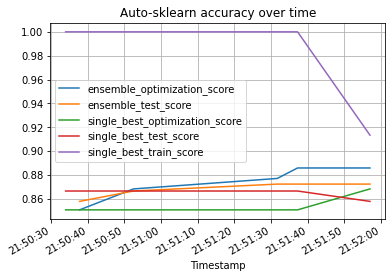

In [11]:
pd.merge(
    ensemble_performance_frame,
    individual_performance_frame,
    on="Timestamp", how='outer'
).sort_values('Timestamp').fillna(method='ffill').plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()